<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости.

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [7]:
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [8]:
#renaming some columns
df = df.rename(columns={"cityCenters_nearest":"city_centers_nearest"})
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
for col in df.columns:
    if df[col].isna().sum() != 0:
        print(col,'\t', df[col].isna().sum())

ceiling_height 	 9195
floors_total 	 86
living_area 	 1903
is_apartment 	 20924
kitchen_area 	 2278
balcony 	 11519
locality_name 	 49
airports_nearest 	 5542
city_centers_nearest 	 5519
parks_around3000 	 5518
parks_nearest 	 15620
ponds_around3000 	 5518
ponds_nearest 	 14589
days_exposition 	 3181


### Вывод

После беглого анализа ясно, что нужно:
- Изменить тип:
    - first_day_exposition - datetime
    - last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - int
- По возможности заполнить пропуски в столбцах   <b>'ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition'</b>
 
 Также видно, что у значений цены есть выбивающиеся значения (максимум ~800 млн, минимум ~10 тыс). Нужно будет отсекать лишние значения.

## Предобработка данных

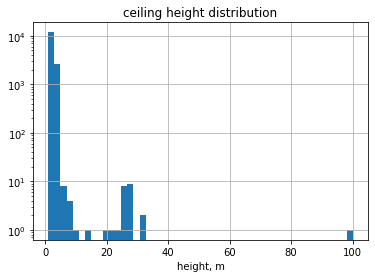

In [16]:
df.ceiling_height.hist(bins=50, log=True)
plt.xlabel('height, m')
plt.title('ceiling height distribution')
plt.show()

In [17]:
df.ceiling_height.sort_values()

22590    1.00
5712     1.20
16934    1.75
2572     2.00
19329    2.00
         ... 
23687     NaN
23690     NaN
23692     NaN
23695     NaN
23696     NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [18]:
df[df.floors_total.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [20]:
#missing values in "balcony" are 0
df.balcony = df.balcony.fillna(0)
df.balcony.astype('int')
df.balcony.isna().sum()

0

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [26]:
df.ceiling_height.describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [27]:
# filling missinig ceiling heghts with median value
df.ceiling_height = df.ceiling_height.fillna(df.ceiling_height.median())
df.ceiling_height.isna().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [29]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод
Заполнили пропуски в значении высоты потолков медианным значением (можно и средним)
Пропуски в количестве балконов заполнили нулями (вероятно их не указали при заполении таблицы)
Заполнить пропуски в остальных столбцах на основе логических рассуждений не представляется возможным.

## Расчёты и добавление результатов в таблицу

In [30]:
#рассчитываем цену квадратного метра
# df['price_m2'] = df['last_price'] / df['total_area']
df.insert(3, 'price_m2', df['last_price'] / df['total_area'])

In [31]:
#день недели, месяц и год публикации объявления;
df['publication_day'] = df['first_day_exposition'].dt.weekday
df['publication_month'] = df['first_day_exposition'].dt.month
df['publication_year'] = df['first_day_exposition'].dt.year

In [32]:
# этаж квартиры; варианты — первый, последний, другой;
def floor_cat(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    if math.isnan(floors_total):
        return float("nan")
    return 'other'
df['floor_cat'] = df.apply(floor_cat, axis=1)

In [33]:
df['floor_cat'].isna().sum()

83

In [34]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['living/total'] = df.living_area / df.total_area
df['kitchen/total'] = df.kitchen_area / df.total_area

In [35]:
df.head()

,total_images,last_price,total_area,price_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,publication_day,publication_month,publication_year,floor_cat,living/total,kitchen/total
0,20,13000000.0,108.0,120370.370370,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.4,82920.792079,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.0,92785.714286,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,8,2015,other,0.612500,0.148214
3,0,64900000.0,159.0,408176.100629,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4,7,2015,other,NaN,NaN
4,2,10000000.0,100.0,100000.000000,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,6,2018,other,0.320000,0.410000


### Вывод
Добавили новые параметры в таблицу на основе имеющихся

## Исследовательский анализ данных

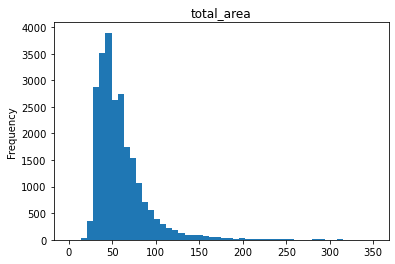

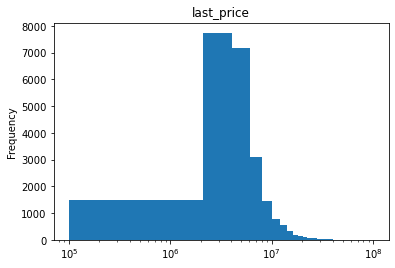

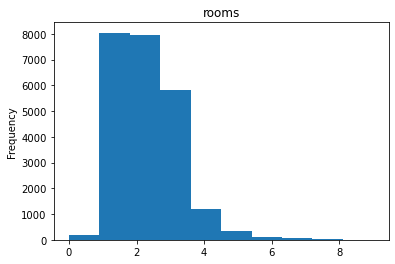

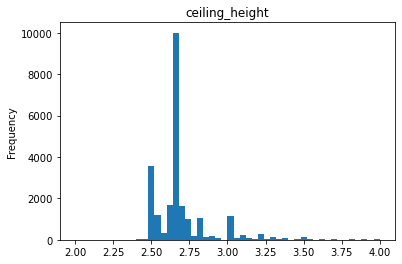

In [37]:
df.total_area.plot(kind='hist', bins=50, range=(0,350), title='total_area')
plt.show()
df.last_price.plot(kind='hist', bins=50, range=(1e5,100e6), title='last_price', logx=True)
plt.show()
df.rooms.plot(kind='hist', bins=10, range=(0,9), title='rooms')
plt.show()
df.ceiling_height.plot(kind='hist', bins=50, range=(2,4), title='ceiling_height')
plt.show()

In [38]:
df[df.days_exposition.isna()]

,total_images,last_price,total_area,price_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,publication_day,publication_month,publication_year,floor_cat,living/total,kitchen/total
0,20,13000000.0,108.00,120370.370370,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019,other,0.472222,0.231481
7,5,7915000.0,71.60,110544.692737,2019-04-18,2,2.65,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3,4,2019,other,NaN,0.263966
44,13,5350000.0,40.00,133750.000000,2018-11-18,1,2.65,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,6,11,2018,other,NaN,NaN
45,17,5200000.0,50.60,102766.798419,2018-12-02,2,2.65,9.0,30.3,7,NaN,False,False,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,6,12,2018,other,0.598814,0.138340
46,17,6600000.0,52.10,126679.462572,2019-01-31,2,2.60,24.0,29.7,9,NaN,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,3,1,2019,other,0.570058,0.159309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,147586.206897,2018-11-02,4,3.00,26.0,71.4,17,NaN,False,False,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,4,11,2018,other,0.492414,0.107586
23685,15,2490000.0,31.00,80322.580645,2019-01-24,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,3,1,2019,last,0.558065,0.180645
23694,9,9700000.0,133.81,72490.845228,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,1,3,2017,other,0.547792,0.103356
23696,18,2500000.0,56.70,44091.710758,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2018,first,0.523810,NaN


In [39]:
df.query('total_images != 0').describe()

,total_images,last_price,total_area,price_m2,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,publication_day,publication_month,publication_year,living/total,kitchen/total
count,22640.000000,2.264000e+04,22640.000000,2.264000e+04,22640.00000,22640.000000,22561.000000,20888.000000,22640.000000,20549.000000,22640.000000,17349.000000,17370.000000,17371.000000,7751.000000,17371.000000,8735.000000,19516.000000,22640.000000,22640.000000,22640.000000,20888.000000,20549.000000
mean,10.319611,6.598647e+06,60.555976,9.976804e+04,2.07288,2.718435,10.720624,34.535524,5.917933,10.616413,0.592182,28815.234941,14101.146402,0.614530,491.285512,0.773531,516.028163,182.715157,2.565901,6.389973,2017.378445,0.563968,0.187712
std,5.389126,1.108490e+07,35.907025,5.063574e+04,1.08130,0.715064,6.618854,22.192379,4.908040,5.956931,0.961230,12584.096865,8504.494813,0.803593,344.291628,0.939416,277.160052,220.587248,1.788939,3.487839,1.038239,0.105388,0.073331
min,1.000000,1.219000e+04,12.000000,1.118349e+02,0.00000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.450000e+06,40.000000,7.692308e+04,1.00000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18641.000000,9163.250000,0.000000,287.500000,0.000000,293.000000,45.000000,1.000000,3.000000,2017.000000,0.494163,0.133333
50%,10.000000,4.650000e+06,52.000000,9.523202e+04,2.00000,2.650000,9.000000,30.000000,4.000000,9.200000,0.000000,26771.000000,13056.000000,0.000000,453.000000,1.000000,500.000000,98.000000,3.000000,6.000000,2017.000000,0.566728,0.172477
75%,14.000000,6.800000e+06,70.000000,1.145479e+05,3.00000,2.700000,16.000000,42.400000,8.000000,12.000000,1.000000,37284.000000,16267.000000,1.000000,612.000000,1.000000,724.000000,234.000000,4.000000,10.000000,2018.000000,0.637102,0.232787
max,50.000000,7.630000e+08,900.000000,1.907500e+06,19.00000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


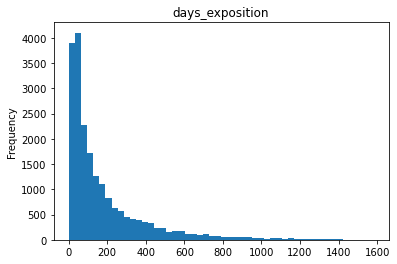

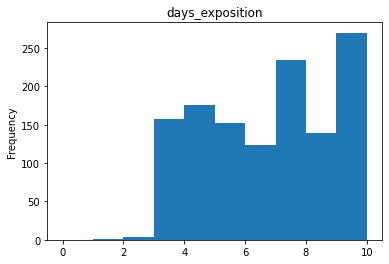

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

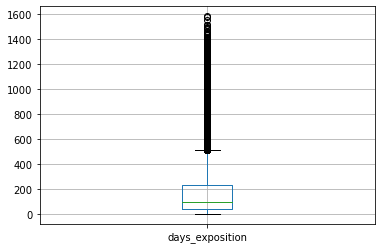

In [40]:
df.days_exposition.plot(kind='hist', bins=50,  title='days_exposition')
plt.show()
df.days_exposition.plot(kind='hist', bins=10, range=(0,10),  title='days_exposition')
plt.show()
df.boxplot(column='days_exposition')
df.days_exposition.describe()

Среди продолжительности продажи квартир наблюдается монотонное уменьшение (при приближении заметны редкие скачки в диапазоне 0-100 дней, наверное можно отнести к шуму)
Судя по boxplot диаграмме, значения более 500 дней можно отнести к высоким. Значения 0-100 дней не являются выбивающимися

In [26]:
df.days_exposition.value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Среди других выделяются значения 45, 60, 90. Возможно они возникают вследствие ручного заполнения колонки с продолжительностью продажи и соответствуют "круглым" значениям времени: 1.5, 2 и 3 месяца.

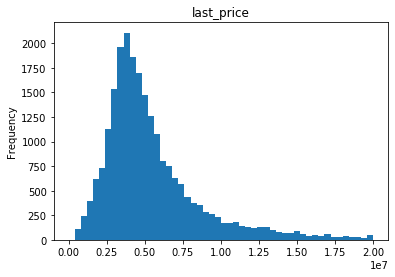

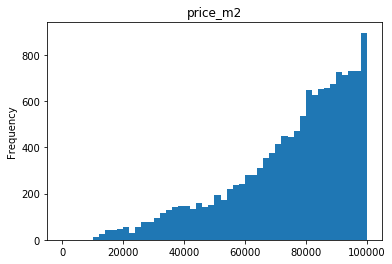

In [27]:
df.last_price.plot(kind='hist', bins=50, range=(0,20e6),  title='last_price')
plt.show()
df.price_m2.plot(kind='hist', bins=50, range=(0,1e5),  title='price_m2')
plt.show()

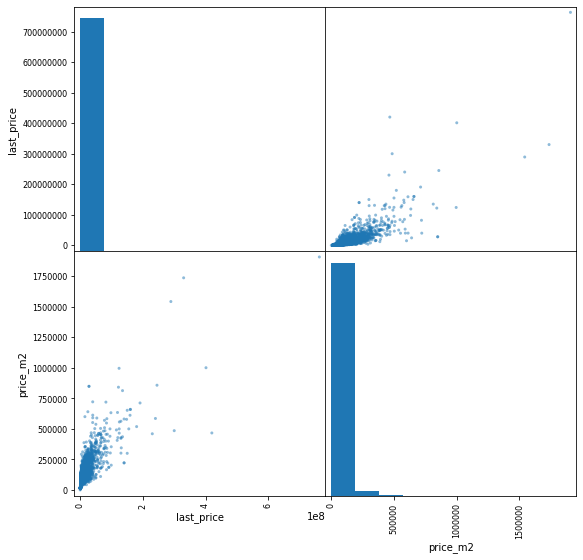

In [28]:
pd.plotting.scatter_matrix(df[['last_price', 'price_m2']], figsize=(9,9))
plt.show()

(0, 100000000.0)

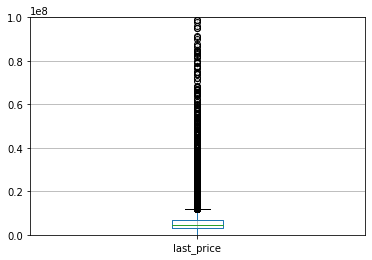

In [29]:
df.boxplot(column='last_price')
plt.ylim(0,10e7)

In [30]:
#Оставляем достоверные данные 
data_good = df.query('last_price < 3e7')
data_good = data_good.query('total_images > 1')

In [31]:
data_good = data_good.query('last_price > 5e4')
data_good = data_good.query('days_exposition > 1')

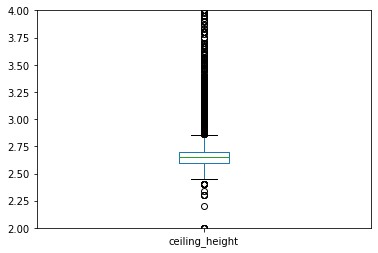

In [32]:
data_good.ceiling_height.plot(kind='box', ylim=(2,4))

In [33]:
data_good = data_good.query('2.25<= ceiling_height <3.5')

In [34]:
data_good.describe()

,total_images,last_price,total_area,price_m2,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,publication_day,publication_month,publication_year,living/total,kitchen/total
count,18224.000000,1.822400e+04,18224.000000,18224.000000,18224.000000,18224.000000,18163.000000,16802.000000,18224.000000,16518.000000,18224.000000,13993.000000,14009.000000,14009.000000,5991.000000,14009.000000,6842.000000,18224.000000,18224.000000,18224.000000,18224.000000,16802.000000,16518.000000
mean,10.445292,5.473549e+06,56.476874,95338.371570,1.979532,2.673120,11.011011,32.110517,6.069469,10.184009,0.602831,28966.006503,14458.516668,0.577629,496.322984,0.733314,525.399445,179.580827,2.581102,6.579785,2017.242812,0.561206,0.190554
std,5.080969,3.650393e+06,26.155599,33069.709701,0.989030,0.155183,6.682504,17.162883,4.997580,4.907212,0.955387,12789.301106,8304.799101,0.776669,351.093419,0.911475,276.140846,216.207011,1.788034,3.475962,0.952316,0.104456,0.071954
min,2.000000,4.300000e+05,12.000000,7962.962963,0.000000,2.300000,1.000000,2.000000,1.000000,2.000000,0.000000,6450.000000,287.000000,0.000000,1.000000,0.000000,16.000000,2.000000,0.000000,1.000000,2014.000000,0.038462,0.025381
25%,7.000000,3.400000e+06,39.200000,76626.554470,1.000000,2.600000,5.000000,18.100000,2.000000,7.000000,0.000000,18403.000000,9988.000000,0.000000,288.000000,0.000000,309.000000,45.000000,1.000000,3.000000,2017.000000,0.490450,0.136364
50%,10.000000,4.500000e+06,50.000000,93939.393939,2.000000,2.650000,9.000000,29.600000,5.000000,9.000000,0.000000,27144.000000,13271.000000,0.000000,454.000000,0.000000,510.000000,97.000000,3.000000,7.000000,2017.000000,0.563792,0.176471
75%,14.000000,6.300000e+06,66.300000,111538.461538,3.000000,2.700000,16.000000,40.400000,8.000000,11.600000,1.000000,37552.000000,16432.000000,1.000000,616.000000,1.000000,733.000000,229.000000,4.000000,10.000000,2018.000000,0.634070,0.235955
max,50.000000,2.999900e+07,460.800000,355555.555556,16.000000,3.490000,60.000000,279.600000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


#### Вывод
Убрали из датасета редкие и выбивающиеся значения.

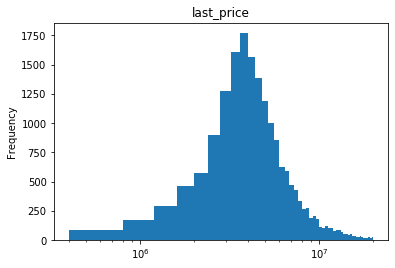

In [35]:
data_good.last_price.plot(kind='hist', bins=50, range=(0,20e6),  title='last_price', logx=True)
plt.show()

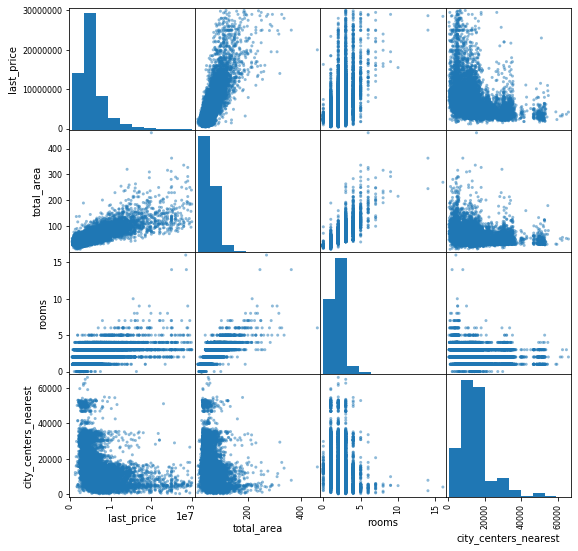

In [36]:
pd.plotting.scatter_matrix(data_good[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(9,9))
plt.show()

,last_price
floor_cat,
first,3794500.0
last,4200000.0
other,4680000.0


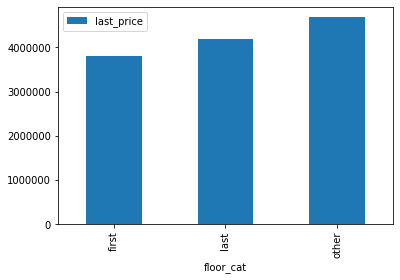

In [37]:
display(data_good.pivot_table(index='floor_cat', values='last_price', aggfunc='median'))
data_good.pivot_table(index='floor_cat', values='last_price', aggfunc='median').plot(kind='bar')

,last_price
publication_day,
0,4500000.0
1,4570000.0
2,4500000.0
3,4525000.0
4,4400000.0
5,4500000.0
6,4450000.0


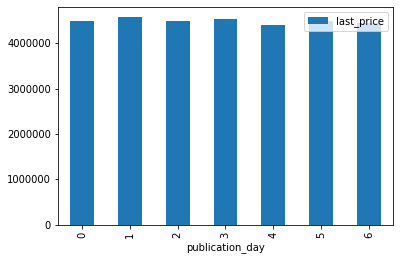

In [38]:
display(data_good.pivot_table(index='publication_day', values='last_price', aggfunc='median'))
data_good.pivot_table(index='publication_day', values='last_price', aggfunc='median').plot(kind='bar')

,last_price
publication_month,
1,4500000.0
2,4500000.0
3,4450000.0
4,4500000.0
5,4500000.0
6,4350000.0
7,4450000.0
8,4500000.0
9,4600000.0


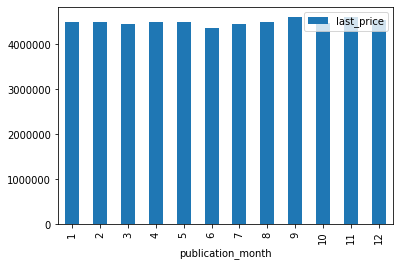

In [39]:
display(data_good.pivot_table(index='publication_month', values='last_price', aggfunc='median'))
data_good.pivot_table(index='publication_month', values='last_price', aggfunc='median').plot(kind='bar')

,last_price
publication_year,
2014,6625000.0
2015,5100000.0
2016,4450000.0
2017,4490000.0
2018,4450000.0
2019,4800000.0


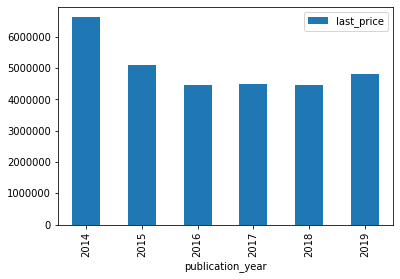

In [40]:
display(data_good.pivot_table(index='publication_year', values='last_price', aggfunc='median'))
data_good.pivot_table(index='publication_year', values='last_price', aggfunc='median').plot(kind='bar')

In [41]:
#Смотрим корреляцию между ценой и другими параметрами
display(data_good.corr()
        .loc['last_price', 
             ['last_price', 'total_area', 'rooms', 'city_centers_nearest', 'publication_day', 'publication_month', 'publication_year']
            ])

last_price              1.000000
total_area              0.781099
rooms                   0.516917
city_centers_nearest   -0.337672
publication_day        -0.009312
publication_month       0.005340
publication_year       -0.066480
Name: last_price, dtype: float64

#### Вывод
Цена возрастает при увеличении площади квартиры и количества комнат. Так же влияет этаж квартиры: цена для не первого и не последнего этажа будет выше.
Расстояние от центра города, день, месяц и год публикации не влияют на стоимость (Хотя медианная стоиость жилья была и выше в 2014 году).

,counts,price_m2
Санкт-Петербург,12074,108488.221790
посёлок Мурино,478,86077.714110
посёлок Шушары,361,78974.447403
Всеволожск,311,67021.970889
посёлок Парголово,273,89703.115969
деревня Кудрово,263,92285.131568
Пушкин,257,102119.474592
Колпино,255,75111.312016
Гатчина,250,67620.533665
Выборг,194,57143.775596


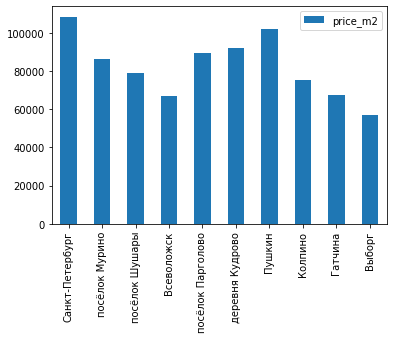

In [42]:
big_cities_stat = pd.DataFrame(data_good['locality_name'].value_counts()[:10])
big_cities_stat = big_cities_stat.join(
    data_good.pivot_table(index='locality_name', values='price_m2'))
big_cities_stat.columns = ['counts', 'price_m2']
display(big_cities_stat)
big_cities_stat.plot(y='price_m2', kind='bar')

#### Вывод
Среди крупных городов самая высокая стоимость кв. метра в Санкт-Петербурге, самая низкая - в Выборге

In [43]:
data_good_spb = data_good.query('locality_name == "Санкт-Петербург"')
data_good_spb = data_good_spb.dropna(subset=['city_centers_nearest'])
data_good_spb['city_centers_km'] = round(data_good_spb['city_centers_nearest']/1000, 0)
data_good_spb['city_centers_km'] = data_good_spb['city_centers_km'].astype(int)

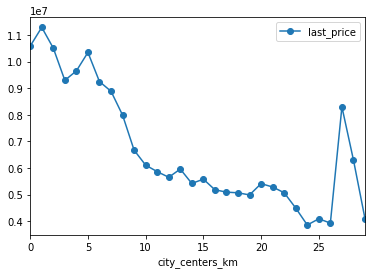

In [44]:
(data_good_spb
    .pivot_table(index='city_centers_km', values='last_price')
    .plot(style='-o')
)


#### Вывод 
Ориентировочно центральная зона - область с ралиусом 7 км. 

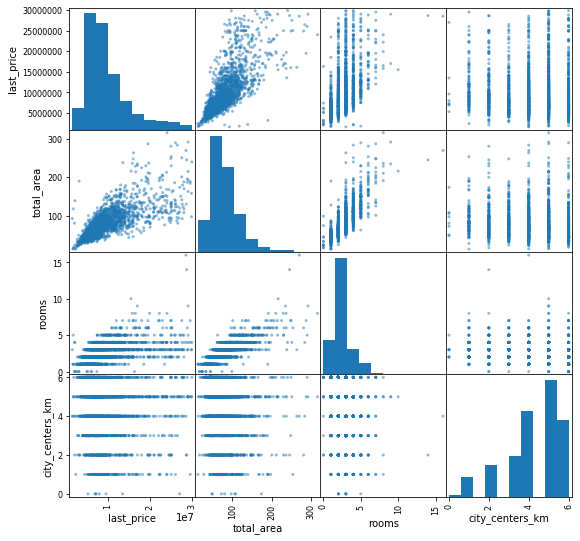

In [45]:
data_good_spb_center = data_good_spb.query('city_centers_km < 7')
pd.plotting.scatter_matrix(data_good_spb_center[['last_price', 'total_area', 'rooms', 'city_centers_km']], figsize=(9,9))
plt.show()

In [46]:
#Смотрим корреляцию между ценой и другими параметрами
display(data_good_spb_center.corr()
        .loc['last_price', 
             ['last_price', 'total_area', 'rooms', 'city_centers_km', 'publication_day', 'publication_month', 'publication_year']
            ])

last_price           1.000000
total_area           0.733038
rooms                0.493024
city_centers_km     -0.052558
publication_day     -0.013472
publication_month   -0.024491
publication_year    -0.031066
Name: last_price, dtype: float64

,last_price
publication_year,
2014,9000000.0
2015,8589000.0
2016,8750000.0
2017,8455000.0
2018,8300000.0
2019,7950000.0


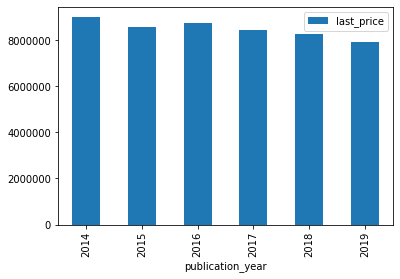

In [47]:
display(data_good_spb_center.pivot_table(index='publication_year', values='last_price', aggfunc='median'))
data_good_spb_center.pivot_table(index='publication_year', values='last_price', aggfunc='median').plot(kind='bar')

,last_price
floor_cat,
first,6050000.0
last,8300000.0
other,8840000.0


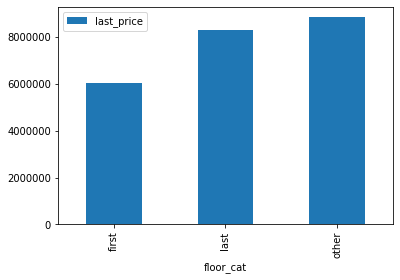

In [48]:
display(data_good_spb_center.pivot_table(index='floor_cat', values='last_price', aggfunc='median'))
data_good_spb_center.pivot_table(index='floor_cat', values='last_price', aggfunc='median').plot(kind='bar')

#### Вывод
Внутри центральной зоны цена не зависит от расстояния от центра и равняется примерно 10 млн руб. за квартиру.
Цена возрастает при увеличении площади квартиры и количества комнат, хотя коэффициент корреляции немного меньше.  
<b>Отличия от общей тенденции</b>: 
- Цена более стабильна в зависимости от года.
- Продавать квартиру на первом этаже еще менее выгодно, чем на любом другом этаже.

## Общий вывод

Был анализирован предложенный датасет со стоимостью квартир в Ленинградской области. Проведена предобработка данных: заменены пропуски, выявлены выбросы, после чего были выявлены закономерности.

Выявлено, что цена квартиры возрастает при увеличении площади квартиры и количества комнат. Так же влияет этаж квартиры: цена для не первого и не последнего этажа будет выше. Расстояние от центра города, день, месяц и год публикации не влияют на стоимость (Хотя медианная стоиость жилья была и выше в 2014 году).
Отличия центральной части Санкт-Петербурга (расстояние менее 7 км от центра) в том, что цена более стабильна в зависимости от года и продавать квартиру на первом этаже еще менее выгодно, чем на любом другом этаже.